<a href="https://colab.research.google.com/github/mahoangnhatphi/mle501/blob/main/MSE_K12_MLE501_Ma_Hoang_Nhat_Phi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

**Context**: </br>
This notebook focuses on determining the employability of university students based on their study results. The dataset, collected from various universities in the Philippines, consists of mock job interview results with nearly 3,000 observations. The notebook aims to perform exploratory data analysis (EDA) to uncover insights and subsequently create a neural network model to predict one's employability. The specific tasks in this notebook include conducting EDA, building a neural network model, and fine-tuning it using hyperparameters, regularization, and optimization techniques. The provided data, in the form of an Excel sheet, contains diverse student characteristics gathered from different universities, which are used to assess their potential for employability.

From the author:
> The dataset was collected from different university agencies in the Philippines. It consists of Mock job Interview Results of 2.982 observations. The dataset collected needs to be normalized and cleaned. The dataset that was collected is compliant with the Data Privacy Act of the Philippines


https://www.kaggle.com/datasets/anashamoutni/students-employability-dataset


## Importing Required Libraries

In [285]:
!pip install kaggle
!rm -rf mle501
!git clone https://github.com/mahoangnhatphi/mle501

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'mle501'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 37 (delta 11), reused 8 (delta 3), pack-reused 0
Unpacking objects: 100% (37/37), 2.72 MiB | 5.45 MiB/s, done.


In [286]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [287]:
import os
# Setup kaggle credential
os.environ['KAGGLE_USERNAME'] = 'phimhongnht'
os.environ['KAGGLE_KEY'] = 'ace8dc63a771b700643375177c78a1a5'

%cd /content
if not os.path.exists('/content/kaggle/Student-Employability-Datasets.xlsx'):
  !kaggle datasets download -d anashamoutni/students-employability-dataset -p ./
  !unzip  ./*.zip -d /content/kaggle
else:
    print('File already exists, no need to download or unzip.')

print(os.listdir('/content/kaggle'))

/content
File already exists, no need to download or unzip.
['Student-Employability-Datasets.xlsx', 'test_data.csv', 'train_data.csv']


In [ ]:
%cd /content/mle501/utils
import glob
file_list = glob.glob('*.py')

import importlib
for file in file_list:
    module_name = file[:-3]  # remove the ".py" extension
    module = importlib.import_module(module_name)

/content/mle501/utils


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
import sklearn.datasets
import scipy.io

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


## Reading XLSX File

This file contains different attributes of the student educational history and skills score. The detailed data dictionary is given below:
</br>

| Column Name               | Description                                   |
|---------------------------|-----------------------------------------------|
| Name of Student           | The name of the student                        |
| GENERAL APPEARANCE        | Evaluation of the student's overall appearance |
| MANNER OF SPEAKING        | Assessment of the student's speaking style     |
| PHYSICAL CONDITION        | Observation of the student's physical well-being |
| MENTAL ALERTNESS          | Assessment of the student's mental sharpness   |
| SELF-CONFIDENCE           | Evaluation of the student's level of confidence |
| ABILITY TO PRESENT IDEAS  | Assessment of the student's ability to express and present ideas |
| COMMUNICATION SKILLS      | Evaluation of the student's communication abilities |
| Student Performance Rating| Rating or score indicating the student's performance |
| CLASS                     | Categorization of the student into "Employable" or "LessEmployable" class |


In [ ]:
from IPython.display import display
data = pd.read_excel('/content/kaggle/Student-Employability-Datasets.xlsx', index_col=0)
display(data.describe(), data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2982 entries, Student 1 to Student 3000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   GENERAL APPEARANCE          2982 non-null   int64 
 1   MANNER OF SPEAKING          2982 non-null   int64 
 2   PHYSICAL CONDITION          2982 non-null   int64 
 3   MENTAL ALERTNESS            2982 non-null   int64 
 4   SELF-CONFIDENCE             2982 non-null   int64 
 5   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 6   COMMUNICATION SKILLS        2982 non-null   int64 
 7   Student Performance Rating  2982 non-null   int64 
 8   CLASS                       2982 non-null   object
dtypes: int64(8), object(1)
memory usage: 233.0+ KB


,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


None

In [ ]:
data.shape

(2982, 9)

## EDA

In [ ]:
data.head() #Returns Top 5 records

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
Name of Student,,,,,,,,,
Student 1,4,5,4,5,5,5,5,5,Employable
Student 2,4,4,4,4,4,4,3,5,Employable
Student 3,4,3,3,3,3,3,2,5,LessEmployable
Student 4,3,3,3,2,3,3,3,5,LessEmployable
Student 5,4,4,3,3,4,4,3,5,Employable


In [ ]:
data.info() #Returns the count of null values and the data types of the features

<class 'pandas.core.frame.DataFrame'>
Index: 2982 entries, Student 1 to Student 3000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   GENERAL APPEARANCE          2982 non-null   int64 
 1   MANNER OF SPEAKING          2982 non-null   int64 
 2   PHYSICAL CONDITION          2982 non-null   int64 
 3   MENTAL ALERTNESS            2982 non-null   int64 
 4   SELF-CONFIDENCE             2982 non-null   int64 
 5   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 6   COMMUNICATION SKILLS        2982 non-null   int64 
 7   Student Performance Rating  2982 non-null   int64 
 8   CLASS                       2982 non-null   object
dtypes: int64(8), object(1)
memory usage: 233.0+ KB


In [ ]:
data.describe() # Returns the statistical descriptions of the data

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
data.isna().sum() #Returns the count of the null values

GENERAL APPEARANCE            0
MANNER OF SPEAKING            0
PHYSICAL CONDITION            0
MENTAL ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY TO PRESENT IDEAS      0
COMMUNICATION SKILLS          0
Student Performance Rating    0
CLASS                         0
dtype: int64

In [ ]:
data.columns = data.columns.str.upper().str.replace(" ","_")
data["EMPLOYABLE"] = data["CLASS"].map({'Employable': 1, 'LessEmployable': 0})

In [ ]:
data.head(10)

,GENERAL_APPEARANCE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,STUDENT_PERFORMANCE_RATING,CLASS,EMPLOYABLE
Name of Student,,,,,,,,,,
Student 1,4,5,4,5,5,5,5,5,Employable,1
Student 2,4,4,4,4,4,4,3,5,Employable,1
Student 3,4,3,3,3,3,3,2,5,LessEmployable,0
Student 4,3,3,3,2,3,3,3,5,LessEmployable,0
Student 5,4,4,3,3,4,4,3,5,Employable,1
Student 6,4,4,3,3,3,3,3,5,Employable,1
Student 7,4,4,4,3,3,3,3,3,Employable,1
Student 8,5,3,3,4,3,3,3,5,Employable,1
Student 9,4,4,4,4,4,4,4,5,Employable,1


In [ ]:
data = data.drop(['CLASS'],axis=1)

In [ ]:
# Returns the count of the null values
data.isna().sum()

GENERAL_APPEARANCE            0
MANNER_OF_SPEAKING            0
PHYSICAL_CONDITION            0
MENTAL_ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY_TO_PRESENT_IDEAS      0
COMMUNICATION_SKILLS          0
STUDENT_PERFORMANCE_RATING    0
EMPLOYABLE                    0
dtype: int64

In [ ]:
# Returns the value counts of the "Employability" and "Not Employability" in the 'CLASS' column
data['EMPLOYABLE'].value_counts()

1    1729
0    1253
Name: EMPLOYABLE, dtype: int64

## Data Visualization

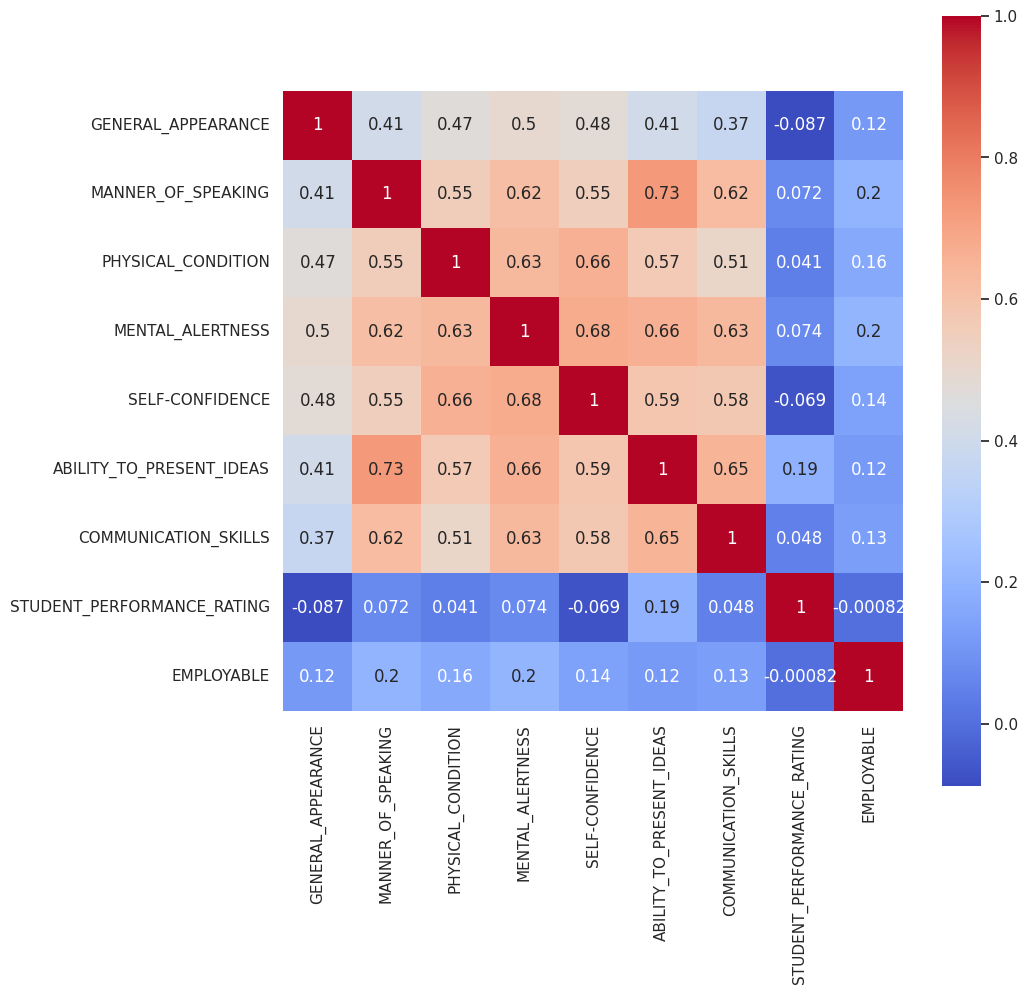

In [ ]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, ax=ax)
plt.show()

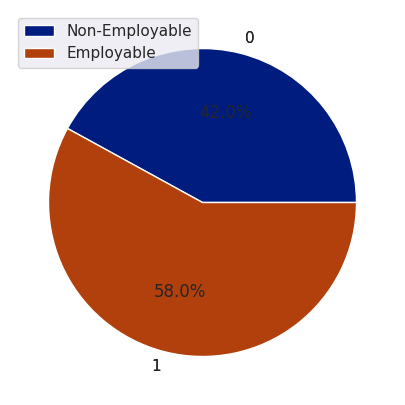

In [ ]:
data.groupby('EMPLOYABLE').size().plot(kind='pie',ylabel="")
data.groupby('EMPLOYABLE').size().plot(kind='pie', ylabel="", autopct='%1.1f%%')

# Add labels to the pie chart
plt.ylabel("")  # Clear the existing ylabel
plt.gca().set_aspect("equal")  # Ensure the pie is drawn as a circle

# Define custom labels
custom_labels = ['Non-Employable', 'Employable']

# Add labels to the legend
plt.legend(labels=custom_labels)

# Display the pie chart
plt.show()

In [ ]:
# Calculate average for each characteristic

col_means = data.loc[:, "GENERAL_APPEARANCE":"STUDENT_PERFORMANCE_RATING"].mean().to_frame().set_axis(["Mean"], axis=1)
col_means = col_means.sort_values(by="Mean", ascending=False)
col_means

,Mean
STUDENT_PERFORMANCE_RATING,4.610664
GENERAL_APPEARANCE,4.246814
PHYSICAL_CONDITION,3.972166
MENTAL_ALERTNESS,3.962777
SELF-CONFIDENCE,3.910798
MANNER_OF_SPEAKING,3.884641
ABILITY_TO_PRESENT_IDEAS,3.813883
COMMUNICATION_SKILLS,3.525486


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'STUDENT_PERFORMANCE_RATING'),
  Text(1, 0, 'GENERAL_APPEARANCE'),
  Text(2, 0, 'PHYSICAL_CONDITION'),
  Text(3, 0, 'MENTAL_ALERTNESS'),
  Text(4, 0, 'SELF-CONFIDENCE'),
  Text(5, 0, 'MANNER_OF_SPEAKING'),
  Text(6, 0, 'ABILITY_TO_PRESENT_IDEAS'),
  Text(7, 0, 'COMMUNICATION_SKILLS')])

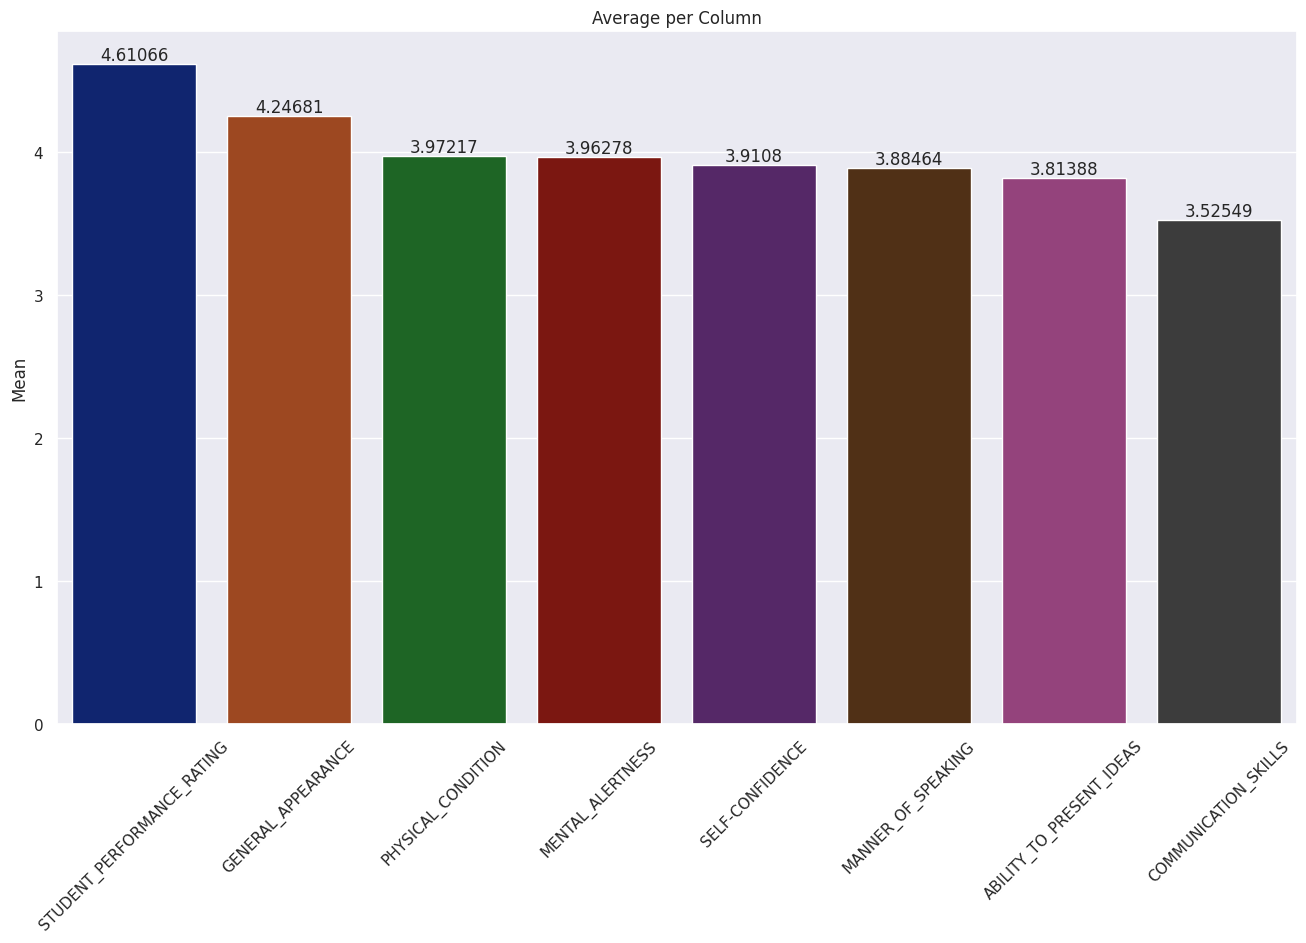

In [ ]:
# Generate plot for average per column

plt.figure(figsize=(16,9))
plt.title("Average per Column")
ax = sns.barplot(data=col_means, x=col_means.index, y="Mean")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)

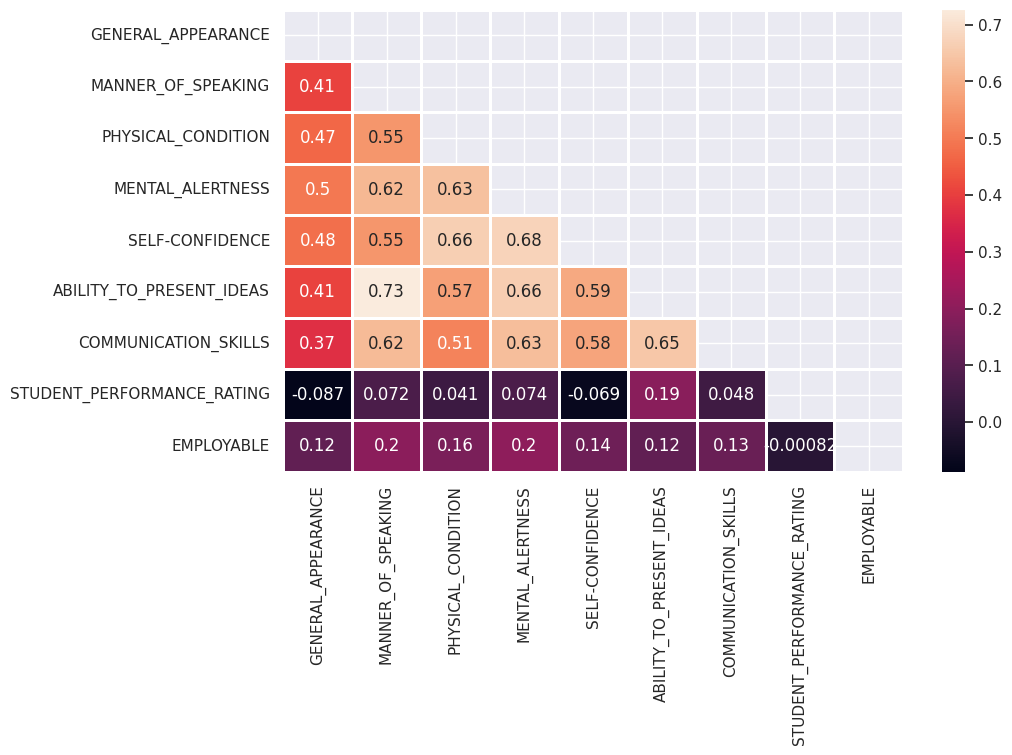

In [ ]:
def correlation_func(data) :
    correlation  = data.corr()
    mask = np.triu(np.ones_like(correlation , dtype = bool))

    plt.figure(figsize = (10,6))
    sns.heatmap(correlation , mask = mask , annot = True , linewidth = 1)


correlation_func(data)

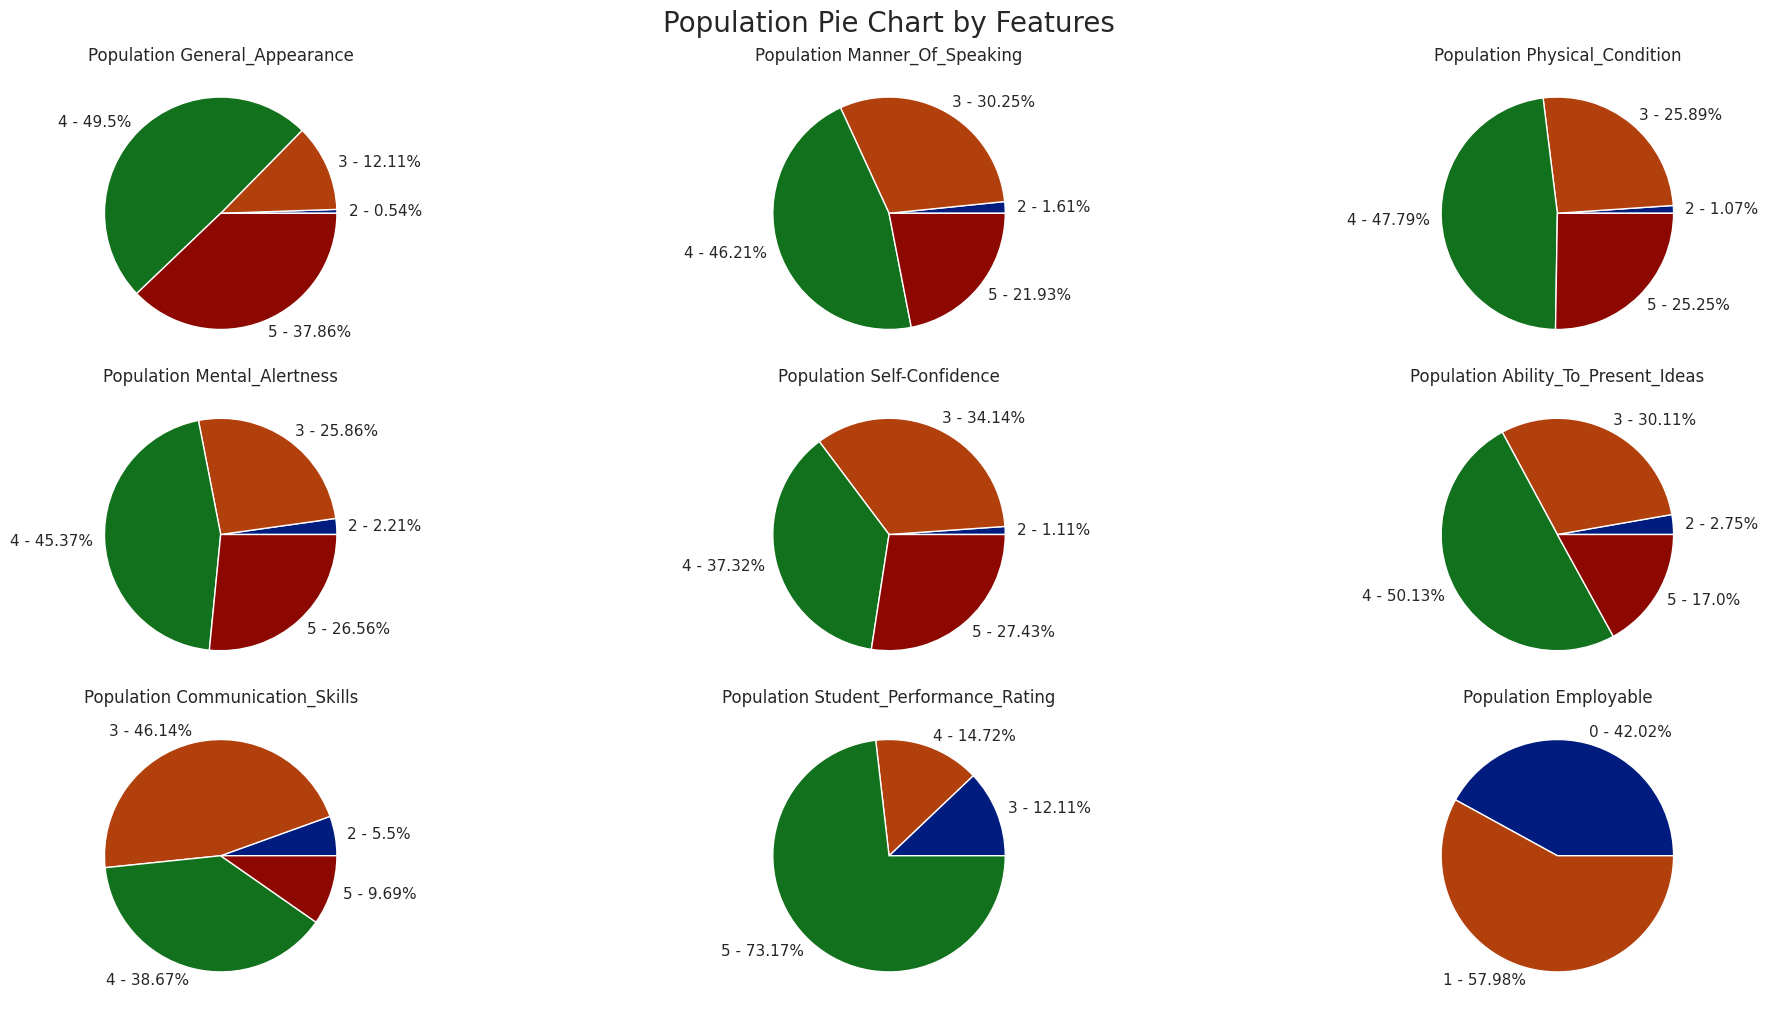

In [ ]:
import math
#Gets the piechart vaariables
def pie_chart_var(col_name, df):
    counts = [g.shape[0] for _,g in  df.groupby(col_name)]
    headers = [g.loc[:,col_name].iloc[0] for _,g in  df.groupby(col_name)]

    #get percentages
    percentages = np.array(counts) / np.array(counts).sum() *100
    headers = [f"{label} - {round(percentage,2)}%" for label, percentage in zip(headers, percentages)]

    return counts, headers


#Creating the figure
col = 3
row = math.ceil(len(data.columns)/col)
fig,ax = plt.subplots(row,col, figsize=(20,10), layout='constrained')

for idx, ax in enumerate(ax.flatten()):
    if idx < len(data.columns):
        col_name = list(data.columns)[idx]
        counts, headers = pie_chart_var(col_name, data)
        ax.pie(counts, labels=headers)
        ax.set_title(f"Population {col_name.title()}")
    else:
        ax.remove()

fig.suptitle("Population Pie Chart by Features", fontsize=20)
plt.show()

In [ ]:
df_employed = data.loc[data['EMPLOYABLE'] == 'Employable']

df_employed = df_employed.drop(columns = ['EMPLOYABLE'])

ave_skills = pd.DataFrame({
    'Student' : data.index[
        data['EMPLOYABLE'] == 1
    ],
    'Average Score': data.loc[
        data['EMPLOYABLE'] == 1
    ]._get_numeric_data().mean(axis = 1)
})

ave_skills.head()

,Student,Average Score
Name of Student,,
Student 1,Student 1,4.333333
Student 2,Student 2,3.666667
Student 5,Student 5,3.444444
Student 6,Student 6,3.222222
Student 7,Student 7,3.111111


In [ ]:
df_ave = pd.DataFrame({
    'Student' : data.index[data['EMPLOYABLE'] == 1],
    'Average Score': data.loc[data['EMPLOYABLE'] == 1]._get_numeric_data().mean(axis = 1)
})
df_ave.head()

,Student,Average Score
Name of Student,,
Student 1,Student 1,4.333333
Student 2,Student 2,3.666667
Student 5,Student 5,3.444444
Student 6,Student 6,3.222222
Student 7,Student 7,3.111111


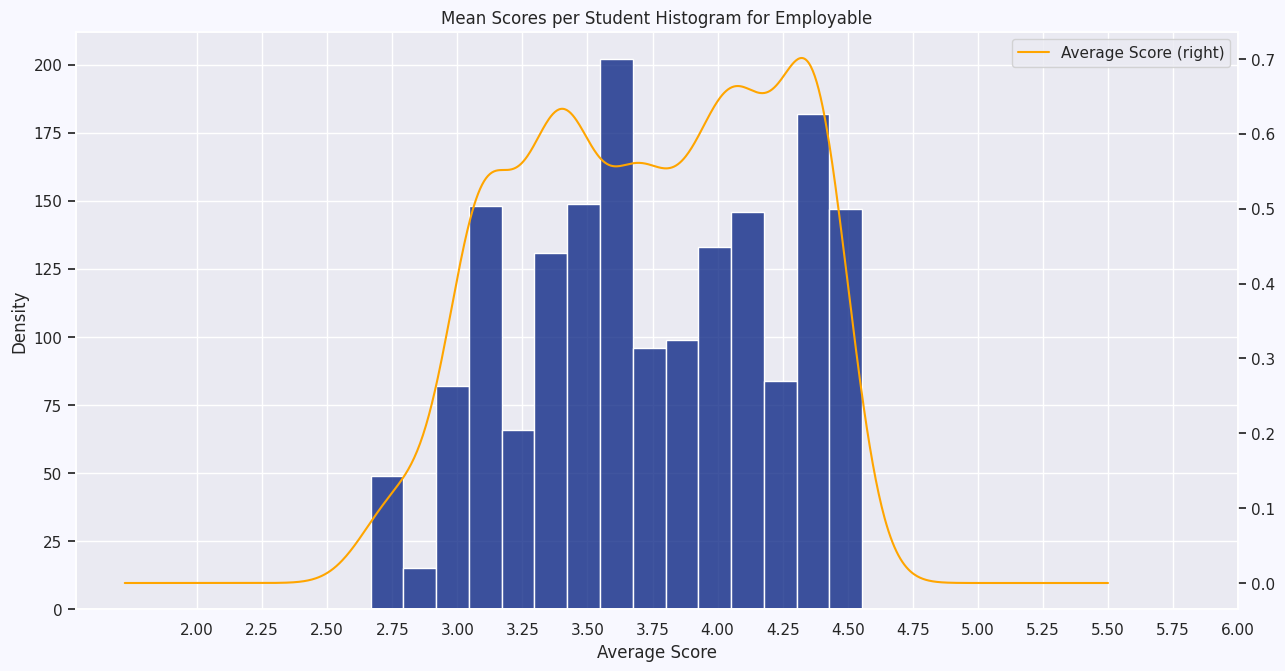

In [ ]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style='darkgrid', palette = 'dark')

ax = sns.histplot(
    x = 'Average Score',
    data = df_ave
)

df_ave.plot(
    kind='kde',
    ax=ax,
    secondary_y=True,
    color = 'orange'
)

plt.xticks(np.arange(2,6.25,0.25))
plt.title('Mean Scores per Student Histogram for Employable')
plt.show()

In [ ]:
df_less = data.loc[data['EMPLOYABLE'] == 0]
df_less.head()

,GENERAL_APPEARANCE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,STUDENT_PERFORMANCE_RATING,EMPLOYABLE
Name of Student,,,,,,,,,
Student 3,4,3,3,3,3,3,2,5,0
Student 4,3,3,3,2,3,3,3,5,0
Student 11,5,5,5,5,5,5,4,5,0
Student 13,4,3,3,2,3,3,2,5,0
Student 14,3,3,3,3,3,2,2,4,0


In [ ]:
df_ave_less = pd.DataFrame({
    'Student' : data.index[
        data['EMPLOYABLE'] == 0
    ],
    'Average Score': data.loc[
        data['EMPLOYABLE'] == 0
    ]._get_numeric_data().mean(axis = 1)
})
df_ave_less

,Student,Average Score
Name of Student,,
Student 3,Student 3,2.888889
Student 4,Student 4,2.777778
Student 11,Student 11,4.333333
Student 13,Student 13,2.777778
Student 14,Student 14,2.555556
...,...,...
Student 2985,Student 2985,3.222222
Student 2990,Student 2990,3.333333
Student 2993,Student 2993,3.333333


In [ ]:
print('LESS EMPLOYABLE STUDENTS')
df_less.loc[df_ave_less['Average Score'] > 3.5].head(10)

LESS EMPLOYABLE STUDENTS


,GENERAL_APPEARANCE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,STUDENT_PERFORMANCE_RATING,EMPLOYABLE
Name of Student,,,,,,,,,
Student 11,5,5,5,5,5,5,4,5,0
Student 18,4,4,4,4,4,4,4,5,0
Student 19,4,4,4,5,5,4,4,5,0
Student 33,5,5,4,5,5,4,4,5,0
Student 34,4,4,4,5,5,4,3,5,0
Student 45,5,4,5,5,4,4,4,5,0
Student 55,5,3,4,4,4,4,3,5,0
Student 56,4,4,4,4,3,4,4,5,0
Student 60,4,4,4,4,5,4,4,5,0


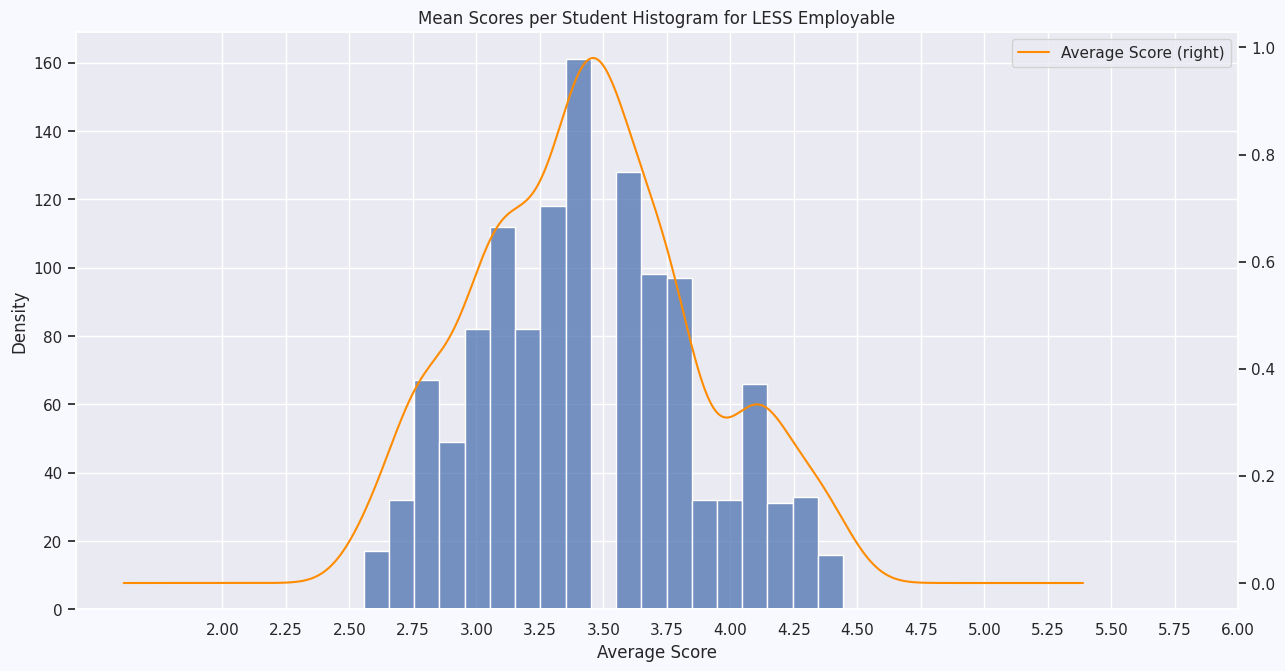

In [ ]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

ax = sns.histplot(
    x = 'Average Score',
    data = df_ave_less
)

df_ave_less.plot(
    kind='kde',
    ax=ax,
    secondary_y=True,
    color = 'darkorange'
)

plt.xticks(np.arange(2,6.25,0.25))
plt.title('Mean Scores per Student Histogram for LESS Employable')
plt.show()

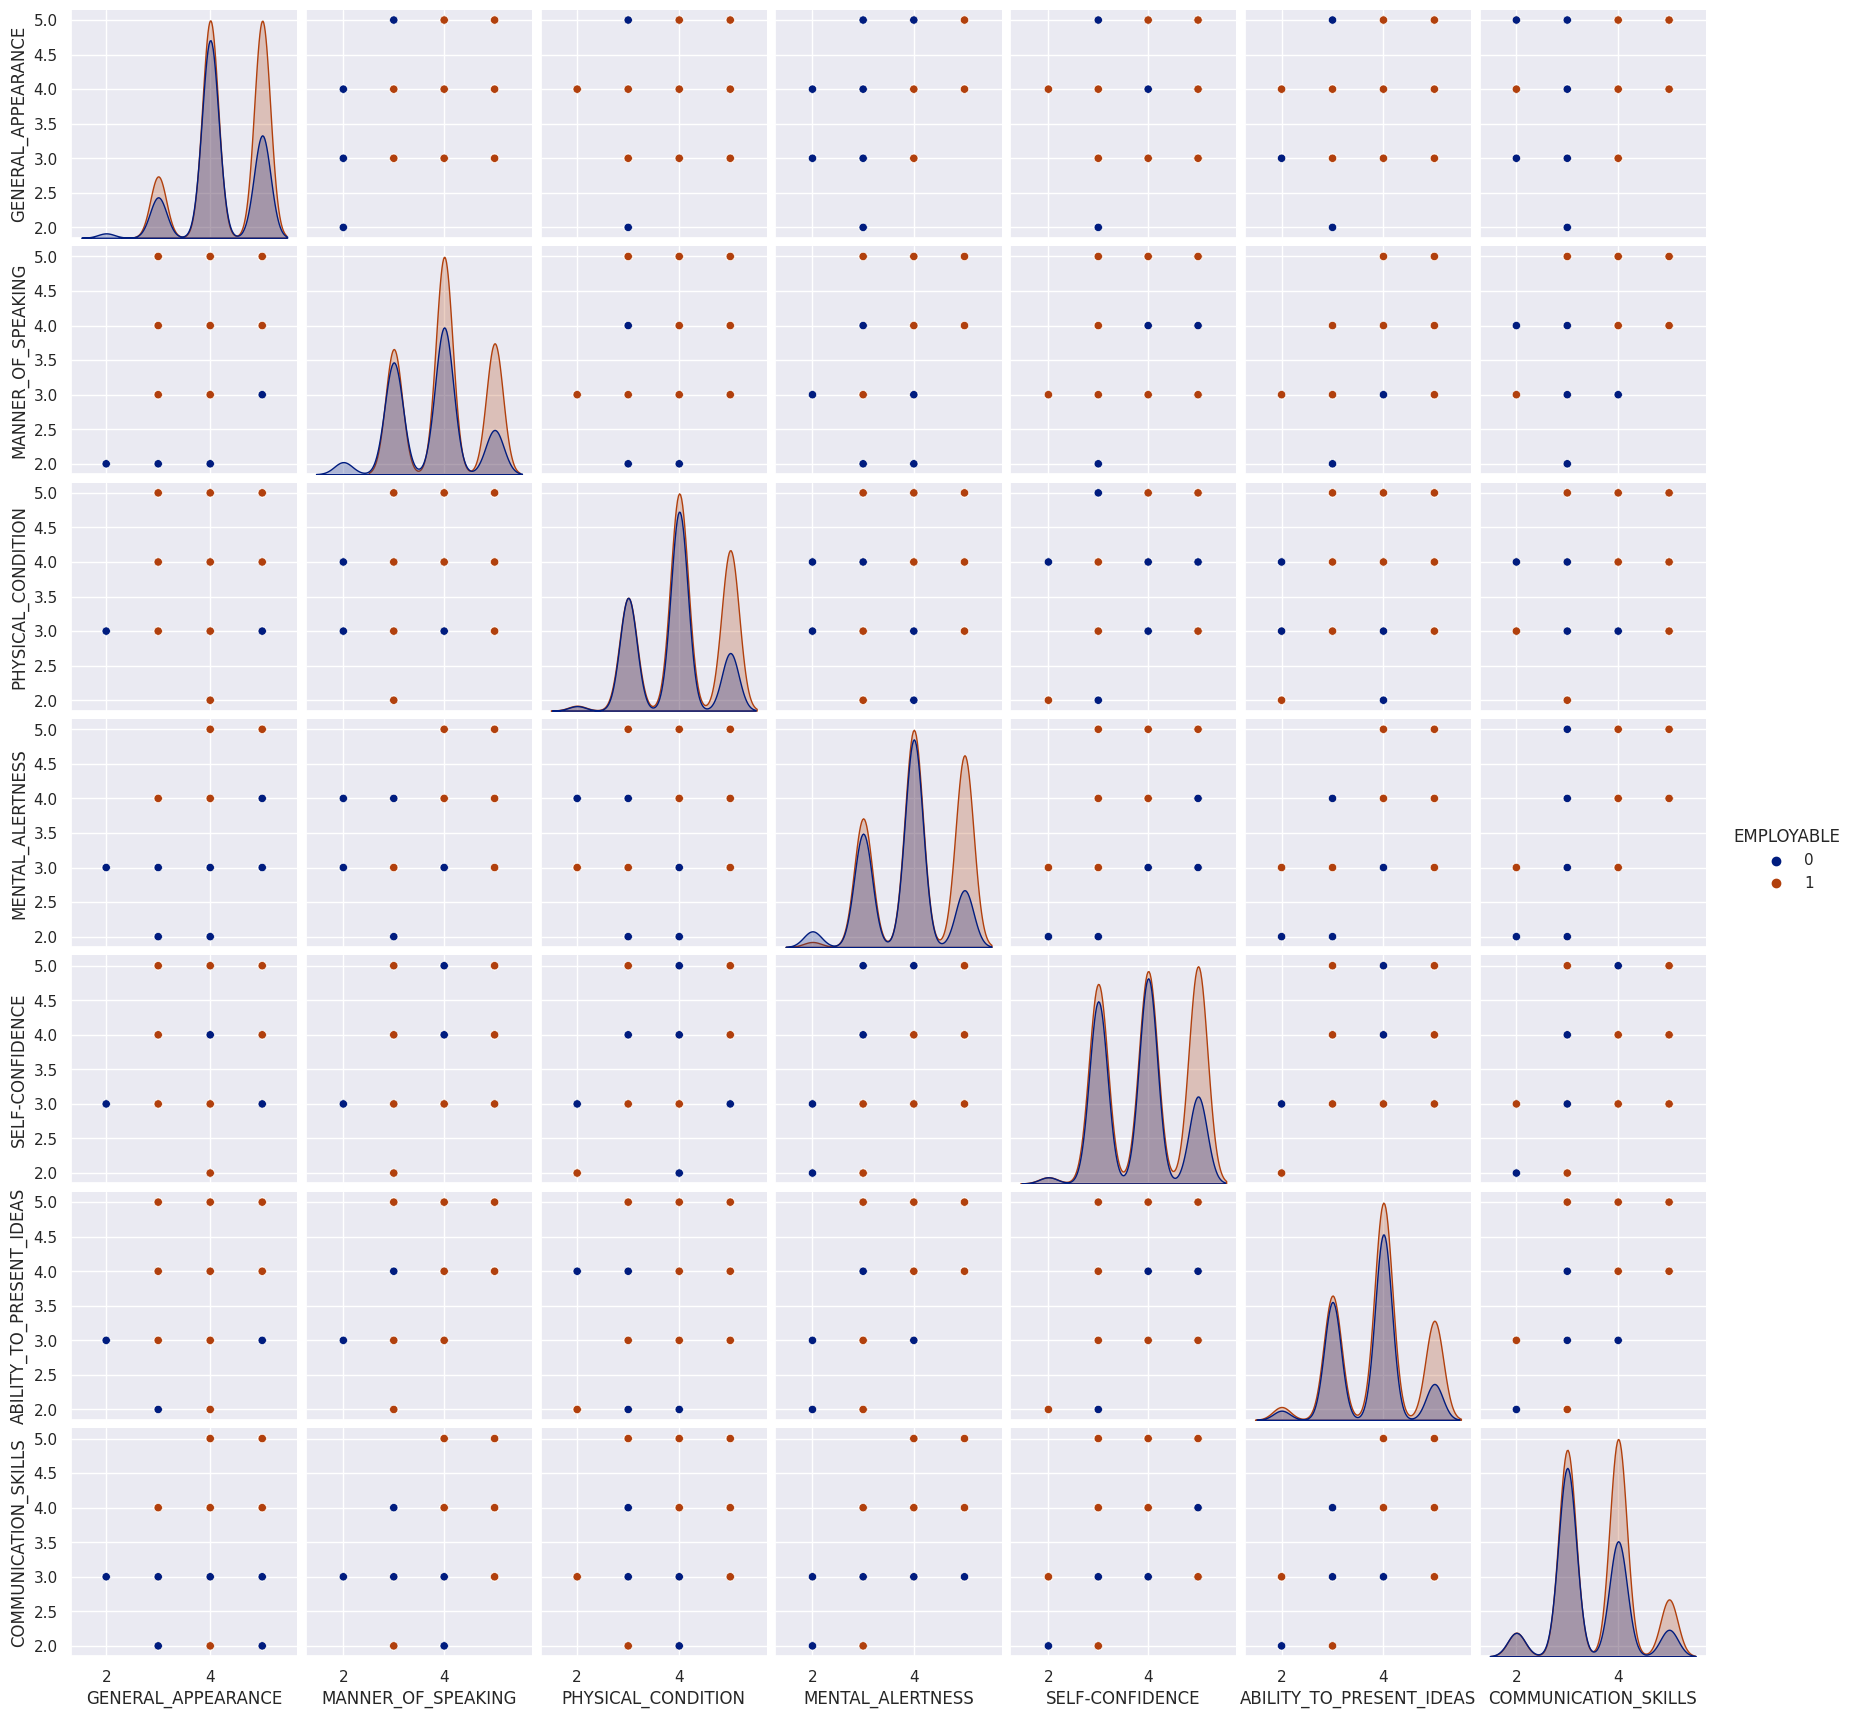

In [ ]:
sns.pairplot(
    vars = [
        'GENERAL_APPEARANCE',
        'MANNER_OF_SPEAKING',
        'PHYSICAL_CONDITION',
        'MENTAL_ALERTNESS',
        'SELF-CONFIDENCE',
        'ABILITY_TO_PRESENT_IDEAS',
        'COMMUNICATION_SKILLS'
    ],
    hue = 'EMPLOYABLE',
    kind = 'scatter',
    data = data
)

plt.show()

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Using Label Encoder all the string type of data gets converted into interger type
le = LabelEncoder()
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = le.fit_transform(data[i].astype(str))

In [ ]:
data.head()

,GENERAL_APPEARANCE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,STUDENT_PERFORMANCE_RATING,EMPLOYABLE
Name of Student,,,,,,,,,
Student 1,4,5,4,5,5,5,5,5,1
Student 2,4,4,4,4,4,4,3,5,1
Student 3,4,3,3,3,3,3,2,5,0
Student 4,3,3,3,2,3,3,3,5,0
Student 5,4,4,3,3,4,4,3,5,1


## Feature Selection using Pearson's Correlation

<Axes: >

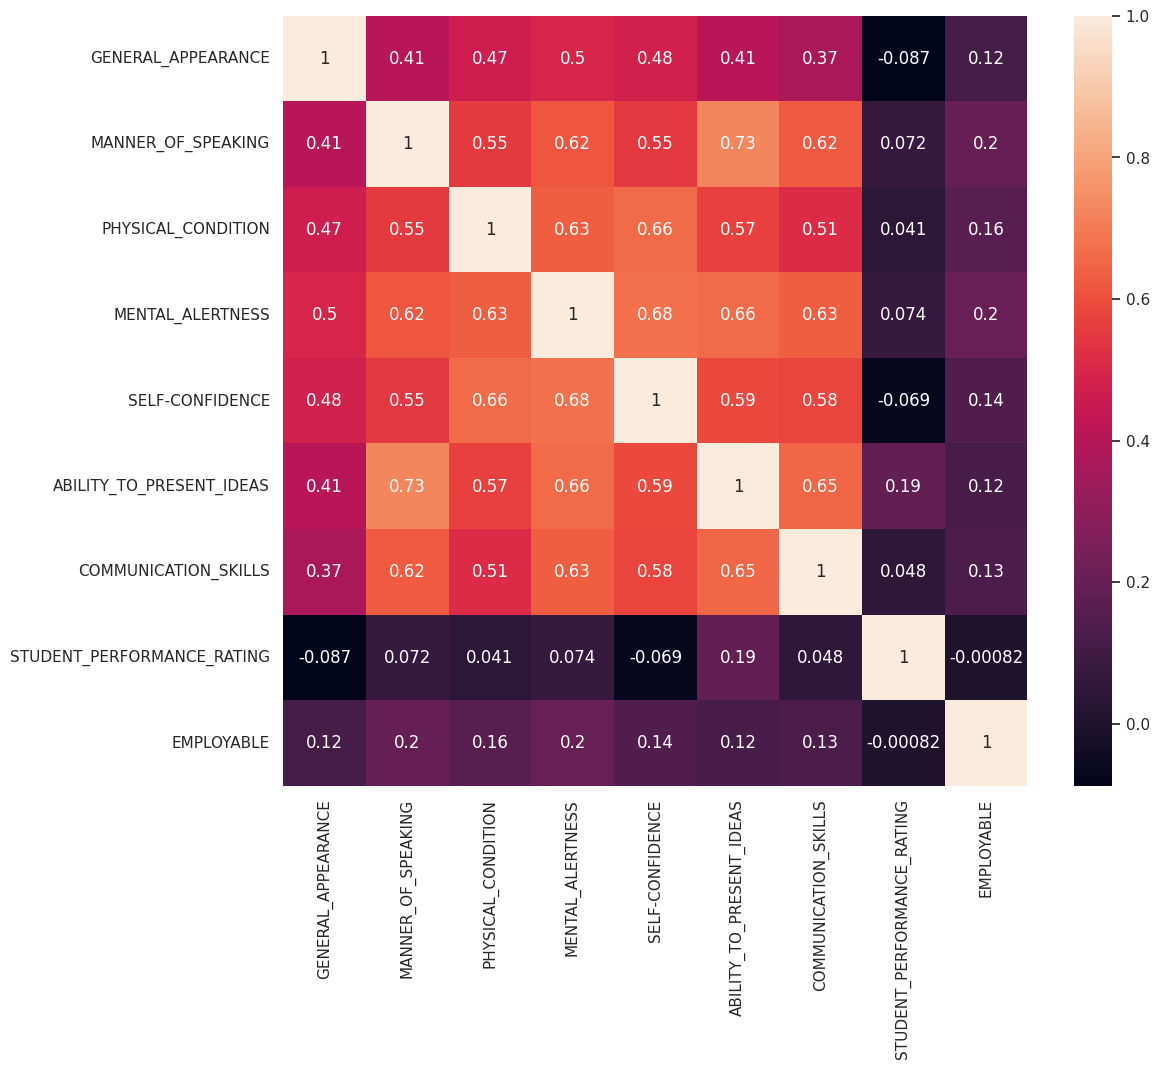

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

## Model Selection

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data.columns

Index(['GENERAL_APPEARANCE', 'MANNER_OF_SPEAKING', 'PHYSICAL_CONDITION',
       'MENTAL_ALERTNESS', 'SELF-CONFIDENCE', 'ABILITY_TO_PRESENT_IDEAS',
       'COMMUNICATION_SKILLS', 'STUDENT_PERFORMANCE_RATING', 'EMPLOYABLE'],
      dtype='object')

In [ ]:
data

,GENERAL_APPEARANCE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,STUDENT_PERFORMANCE_RATING,EMPLOYABLE
Name of Student,,,,,,,,,
Student 1,4,5,4,5,5,5,5,5,1
Student 2,4,4,4,4,4,4,3,5,1
Student 3,4,3,3,3,3,3,2,5,0
Student 4,3,3,3,2,3,3,3,5,0
Student 5,4,4,3,3,4,4,3,5,1
...,...,...,...,...,...,...,...,...,...
Student 2996,4,3,3,3,3,3,2,5,1
Student 2997,3,4,4,4,4,4,4,5,1
Student 2998,4,5,4,5,4,4,4,5,1


In [ ]:
# Independent Variables are stored in X
# Dependent Variable is stored in y
X = data.drop(['EMPLOYABLE'],axis=1)
y = data['EMPLOYABLE']

In [ ]:
X.head()

,GENERAL_APPEARANCE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,STUDENT_PERFORMANCE_RATING
Name of Student,,,,,,,,
Student 1,4,5,4,5,5,5,5,5
Student 2,4,4,4,4,4,4,3,5
Student 3,4,3,3,3,3,3,2,5
Student 4,3,3,3,2,3,3,3,5
Student 5,4,4,3,3,4,4,3,5


In [ ]:
y.head()

Name of Student
Student 1    1
Student 2    1
Student 3    0
Student 4    0
Student 5    1
Name: EMPLOYABLE, dtype: int64

In [ ]:
X.shape

(2982, 8)

In [ ]:
y.shape

(2982,)

In [ ]:
y.value_counts()

1    1729
0    1253
Name: EMPLOYABLE, dtype: int64

## Train - Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Save train data to CSV file
train_data = pd.concat([x_train, y_train], axis=1)
train_data.to_csv('/content/kaggle/train_data.csv', index=False)

# Save test data to CSV file
test_data = pd.concat([x_test, y_test], axis=1)
test_data.to_csv('/content/kaggle/test_data.csv', index=False)

In [ ]:
x_train

,GENERAL_APPEARANCE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,STUDENT_PERFORMANCE_RATING
Name of Student,,,,,,,,
Student 2003,4,5,4,5,5,5,5,5
Student 1792,5,5,5,5,5,5,5,5
Student 1252,4,5,3,5,5,5,3,5
Student 1566,5,5,4,4,5,4,5,3
Student 510,3,3,3,3,4,3,3,3
...,...,...,...,...,...,...,...,...
Student 1639,4,5,4,5,5,5,5,5
Student 1096,3,3,3,2,3,3,3,5
Student 1131,4,4,3,3,3,4,4,3


In [ ]:
y_train

Name of Student
Student 2003    1
Student 1792    0
Student 1252    1
Student 1566    0
Student 510     1
               ..
Student 1639    1
Student 1096    0
Student 1131    0
Student 1295    1
Student 861     0
Name: EMPLOYABLE, Length: 2385, dtype: int64

In [ ]:
print(train_X.shape)
train_X
print(test_X.shape)
test_X

(8, 2385)
(8, 597)


Name of Student,Student 2428,Student 1548,Student 882,Student 332,Student 2244,Student 1243,Student 679,Student 1217,Student 1030,Student 1961,...,Student 2484,Student 1552,Student 1033,Student 213,Student 13,Student 1000,Student 423,Student 1876,Student 1430,Student 2641
GENERAL_APPEARANCE,4,4,5,5,4,4,5,4,5,4,...,5,4,5,4,4,3,4,4,5,4
MANNER_OF_SPEAKING,4,4,5,4,4,3,5,3,4,4,...,4,3,5,3,3,3,3,4,4,3
PHYSICAL_CONDITION,4,4,5,4,4,2,5,4,5,3,...,5,4,5,4,3,3,3,4,3,3
MENTAL_ALERTNESS,3,4,5,3,4,4,5,4,5,4,...,5,3,5,4,2,3,3,4,3,3
SELF-CONFIDENCE,3,4,5,3,5,3,5,4,5,4,...,5,3,5,3,3,3,3,3,3,3
ABILITY_TO_PRESENT_IDEAS,3,4,5,4,4,4,5,3,4,4,...,5,3,5,4,3,2,3,4,3,3
COMMUNICATION_SKILLS,3,4,5,4,4,3,4,3,4,4,...,4,3,3,3,2,2,3,4,2,2
STUDENT_PERFORMANCE_RATING,5,5,5,4,5,5,5,5,4,5,...,5,5,5,5,5,4,5,5,3,5


In [ ]:
print(train_Y.shape)
train_Y
print(test_Y.shape)
test_Y

(1, 2385)
(1, 597)


array([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 

# Model Building

## Neural Network Model

### Initialization
A well-chosen initialization can:
- Speed up the convergence of gradient descent
- Increase the odds of gradient descent converging to a lower training (and generalization) error

In [ ]:
import init_utils as util

In [ ]:
def initialization_model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")

    Returns:
    parameters -- parameters learnt by the model
    """

    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]

    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    elif initialization == "uniform":
        parameters = initialize_parameters_uniform(layers_dims)
    elif initialization == "xavier":
        parameters = initialize_parameters_xavier(layers_dims)

    # Loop (gradient descent)
    for i in range(num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = util.forward_propagation(X, parameters)
        # Loss
        cost = util.compute_loss(a3, Y)
        # Backward propagation.
        grads = util.backward_propagation(X, Y, cache)
        # Update parameters.
        parameters = util.update_parameters(parameters, grads, learning_rate)
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)

    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

#### Zero Initialization

In [ ]:
# GRADED FUNCTION: initialize_parameters_zeros
def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """

    parameters = {}
    L = len(layers_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l - 1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

Cost after iteration 0: 0.6931471805599452
Cost after iteration 1000: 0.6784783292259023
Cost after iteration 2000: 0.6783709355618289
Cost after iteration 3000: 0.6783701073814898
Cost after iteration 4000: 0.6783701009588825
Cost after iteration 5000: 0.6783701009090497
Cost after iteration 6000: 0.6783701009086629
Cost after iteration 7000: 0.6783701009086599
Cost after iteration 8000: 0.6783701009086599
Cost after iteration 9000: 0.6783701009086599
Cost after iteration 10000: 0.6783701009086599
Cost after iteration 11000: 0.67837010090866
Cost after iteration 12000: 0.6783701009086599
Cost after iteration 13000: 0.67837010090866
Cost after iteration 14000: 0.67837010090866


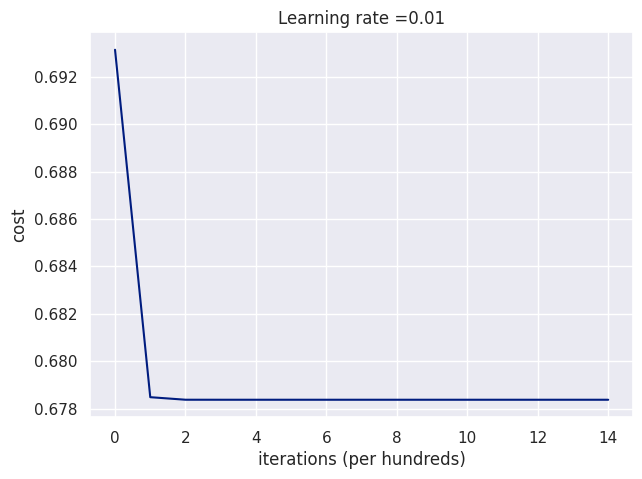

On the train set:
Accuracy: 0.5857442348008386
On the test set:
Accuracy: 0.5561139028475712


In [ ]:
parameters = initialization_model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = util.predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = util.predict(test_X, test_Y, parameters)

#### Random Initialization

In [ ]:
# GRADED FUNCTION: initialize_parameters_random
def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """

    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters

Cost after iteration 0: inf
Cost after iteration 1000: 0.678481442765685
Cost after iteration 2000: 0.6783709594996191
Cost after iteration 3000: 0.6783701075670783
Cost after iteration 4000: 0.6783701009603225
Cost after iteration 5000: 0.6783701009090607
Cost after iteration 6000: 0.6783701009086631
Cost after iteration 7000: 0.6783701009086601
Cost after iteration 8000: 0.6783701009086601
Cost after iteration 9000: 0.67837010090866
Cost after iteration 10000: 0.6783701009086599
Cost after iteration 11000: 0.6783701009086601
Cost after iteration 12000: 0.6783701009086599
Cost after iteration 13000: 0.67837010090866
Cost after iteration 14000: 0.67837010090866


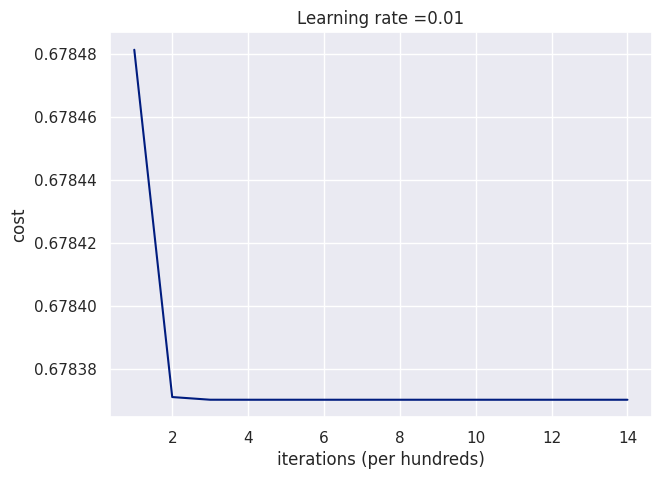

On the train set:
Accuracy: 0.5857442348008386
On the test set:
Accuracy: 0.5561139028475712


In [ ]:
parameters = initialization_model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = util.predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = util.predict(test_X, test_Y, parameters)

#### He Initialization

In [ ]:
# GRADED FUNCTION: initialize_parameters_he
def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers

    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters

Cost after iteration 0: 2.7537285824773554
Cost after iteration 1000: 0.646795039313655
Cost after iteration 2000: 0.63941165843518
Cost after iteration 3000: 0.6329368712418488
Cost after iteration 4000: 0.6269684047449617
Cost after iteration 5000: 0.621114171553327
Cost after iteration 6000: 0.6154960571711254
Cost after iteration 7000: 0.6105333692534994
Cost after iteration 8000: 0.6060920970224859
Cost after iteration 9000: 0.6023329618214589
Cost after iteration 10000: 0.599150061474702
Cost after iteration 11000: 0.5967888471341263
Cost after iteration 12000: 0.5952968768319673
Cost after iteration 13000: 0.594899179303873
Cost after iteration 14000: 0.5972124917835812


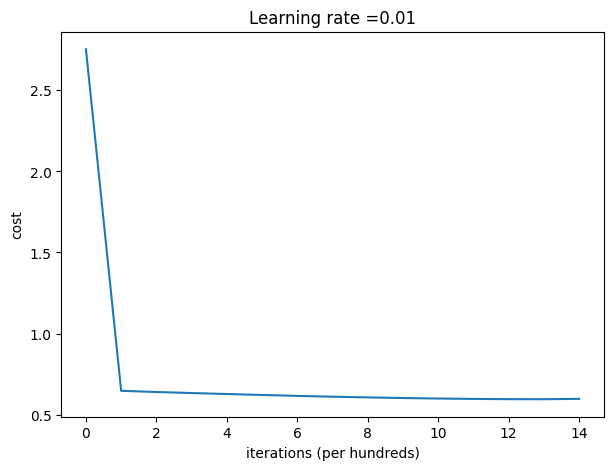

On the train set:
Accuracy: 0.690566037735849
On the test set:
Accuracy: 0.678391959798995


In [ ]:
parameters = initialization_model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = util.predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = util.predict(test_X, test_Y, parameters)


#### Uniform Initalization


In [ ]:
def initialize_parameters_uniform(layer_dims):
    parameters = {}
    L = len(layer_dims) - 1  # Number of layers in the network

    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.uniform(low=-0.1, high=0.1, size=(layer_dims[l], layer_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

Cost after iteration 0: 0.692558834498063
Cost after iteration 1000: 0.6779791589018647
Cost after iteration 2000: 0.6775533809978419
Cost after iteration 3000: 0.67692446444701
Cost after iteration 4000: 0.6759553985186907
Cost after iteration 5000: 0.6746102007961166
Cost after iteration 6000: 0.6727741655570021
Cost after iteration 7000: 0.6704156820875823
Cost after iteration 8000: 0.667331869800371
Cost after iteration 9000: 0.6633979989692474
Cost after iteration 10000: 0.65938621848566
Cost after iteration 11000: 0.6565579282639458
Cost after iteration 12000: 0.6546312343784404
Cost after iteration 13000: 0.6529111760948918
Cost after iteration 14000: 0.6514132032425937


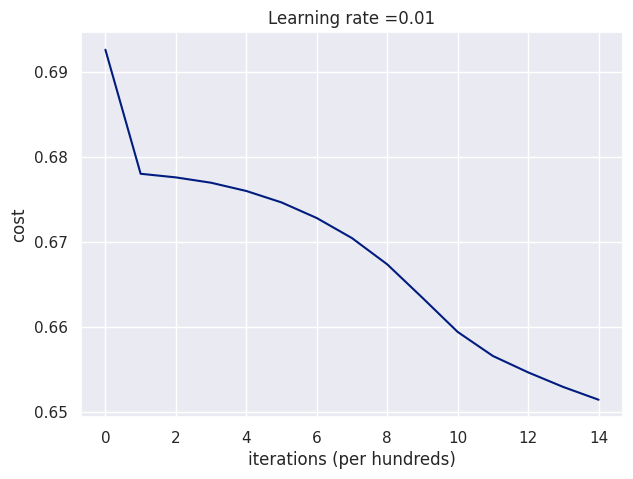

On the train set:
Accuracy: 0.6104821802935011
On the test set:
Accuracy: 0.5946398659966499


In [ ]:
parameters = initialization_model(train_X, train_Y, initialization = "uniform")
print ("On the train set:")
predictions_train = util.predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = util.predict(test_X, test_Y, parameters)

#### Xavier/Glorot Initialization

In [ ]:
def initialize_parameters_xavier(layer_dims):
    parameters = {}
    L = len(layer_dims) - 1  # Number of layers in the network

    for l in range(1, L + 1):
        sqrt_dim = np.sqrt(layer_dims[l-1])
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / sqrt_dim
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

Cost after iteration 0: 0.6921462094701635
Cost after iteration 1000: 0.6606253252870179
Cost after iteration 2000: 0.6543969199938654
Cost after iteration 3000: 0.6506576803914182
Cost after iteration 4000: 0.6422355786119253
Cost after iteration 5000: 0.6369323642453414
Cost after iteration 6000: 0.6311781282150087
Cost after iteration 7000: 0.6246718397084025
Cost after iteration 8000: 0.6173707106119216
Cost after iteration 9000: 0.6087051550753769
Cost after iteration 10000: 0.5981931301944448
Cost after iteration 11000: 0.5866504373383733
Cost after iteration 12000: 0.5723992271588871
Cost after iteration 13000: 0.5719777412848503
Cost after iteration 14000: 0.560756133834765


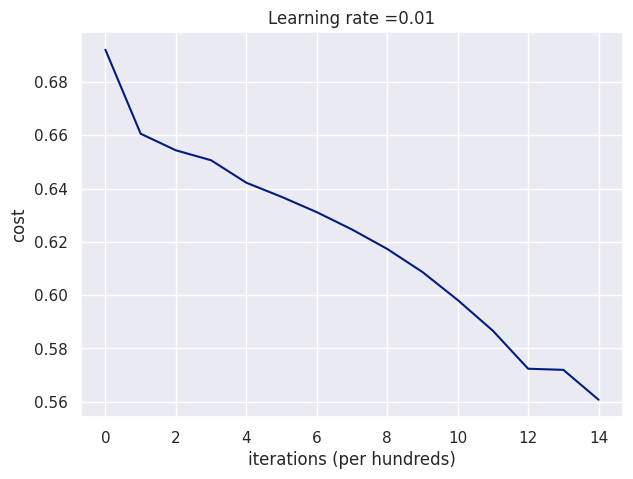

On the train set:
Accuracy: 0.7232704402515723
On the test set:
Accuracy: 0.6850921273031826


In [ ]:
parameters = initialization_model(train_X, train_Y, initialization = "xavier")
print ("On the train set:")
predictions_train = util.predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = util.predict(test_X, test_Y, parameters)

#### Comparison

We tested five initialization methods under the same number of iterations and hyperparameters. Here are the results:


<table>
    <tr>
        <td>
            <b>Model</b>
        </td>
        <td>
            <b>Train accuracy</b>
        </td>
        <td>
            <b>Test accuracy</b>
        </td>
        <td>
            <b>Problem/Comment</b>
        </td>
    </tr>
        <td>
        3-layer NN with zeros initialization
        </td>
        <td>
        58.5%
        </td>
        <td>
        55.6%
        </td>
        <td>
        lack of diversity and a potential for vanishing gradients
        </td>
    <tr>
        <td>
        3-layer NN with large random initialization
        </td>
        <td>
        58.5%
        </td>
        <td>
        55.6%
        </td>
        <td>
        unstable and divergent behavior during training
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        69%
        </td>
        <td>
        67.8%
        </td>
        <td>
        vanishing gradient problem and performs well
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with Uniform initialization
        </td>
        <td>
        61%
        </td>
        <td>
        59.4%
        </td>
        <td>
        a broader range of weights, performs well
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with Xavier/Glorot initialization
        </td>
        <td>
        72.3%
        </td>
        <td>
        68.5%
        </td>
        <td>
          <b>
            outperforms others, effective for sigmoid and tanh activation functions
          </b>
        </td>
    </tr>
</table>

- **Zero Initialization and Random Initialization**: Both methods yield similar and poor performance, with accuracy stagnating at 58.5% for both train and test datasets. They fail to capture the data's complexity due to symmetric initialization.

- **He Initialization**: This method significantly improves accuracy, reaching 69% on the train dataset and 67.8% on the test dataset. It addresses the vanishing gradient problem and performs well with ReLU activation.

- **Uniform Initialization**: Accuracy improves further, achieving 61% on the train dataset and 59.4% on the test dataset. It allows for a broader range of weights and better exploration of feature representations.

- **Xavier/Glorot Initialization**: This method outperforms others, achieving 72.3% accuracy on the train dataset and 68.5% on the test dataset. It balances weight variance with input and output neurons, making it effective for sigmoid and tanh activation functions.


In summary, the choice of initialization method has a significant impact on neural network performance. Zero initialization and large random initialization can cause issues such as vanishing and exploding gradients. However, He initialization and uniform initialization strike a balance between stability and diversity, resulting in improved accuracy. After evaluation, Xavier/Glorot Initialization stands out as the most suitable option for your neural network and dataset, achieving the highest accuracy. This initialization method proves particularly effective when using sigmoid and tanh activation functions.

### Regularization

We will use the following neural network (already implemented for you below). This model can be used:
- in *regularization mode* -- by setting the `lambd` input to a non-zero value. We use "`lambd`" instead of "`lambda`" because "`lambda`" is a reserved keyword in Python.
- in *dropout mode* -- by setting the `keep_prob` to a value less than one

In [ ]:
import reg_utils as reg

#### L2 Regularization

The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Let's modify our cost and observe the consequences.

<a name='ex-1'></a>
### compute_cost_with_regularization
Implement `compute_cost_with_regularization()` which computes the cost given by formula (2). To calculate $\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$  , use :
```python
np.sum(np.square(Wl))
```
Note that we have to do this for $W^{[1]}$, $W^{[2]}$ and $W^{[3]}$, then sum the three terms and multiply by $ \frac{1}{m} \frac{\lambda}{2} $.

In [ ]:
def regularization_model(X, Y, learning_rate = 0.03, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.

    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """

    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]

    # Initialize parameters dictionary.
    parameters = reg.initialize_parameters(layers_dims)
    #parameters = initialize_parameters_he(layers_dims)
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = reg.forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)

        # Cost function
        if lambd == 0:
            cost = reg.compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)

        # Backward propagation.
        assert (lambd == 0 or keep_prob == 1)   # it is possible to use both L2 regularization and dropout,
                                                # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = reg.backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)

        # Update parameters.
        parameters = reg.update_parameters(parameters, grads, learning_rate)

        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))

        if print_cost and i % 1000 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters, grads

In [ ]:
# GRADED FUNCTION: compute_cost_with_regularization
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.

    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model

    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]

    cross_entropy_cost = reg.compute_cost(A3, Y) # This gives you the cross-entropy part of the cost

    #(≈ 1 lines of code)
    L2_regularization_cost = lambd * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3))) / (2 * m)
    cost = cross_entropy_cost + L2_regularization_cost

    return cost

##### Backward Propagation

In [ ]:
# GRADED FUNCTION: backward_propagation_with_regularization
def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.

    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar

    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """

    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    #(≈ 1 lines of code)
    dW3 = 1. / m * np.dot(dZ3, A2.T) + (lambd * W3) / m
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))

    #(≈ 1 lines of code)
    dW2 = 1. / m * np.dot(dZ2, A1.T) + (lambd * W2) / m
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))

    #(≈ 1 lines of code)
    dW1 = 1. / m * np.dot(dZ1, X.T) + (lambd * W1) / m
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients

Cost after iteration 0: 1.0640082122228323
Cost after iteration 10000: 0.5802489039762737
Cost after iteration 20000: 0.4781009574937639


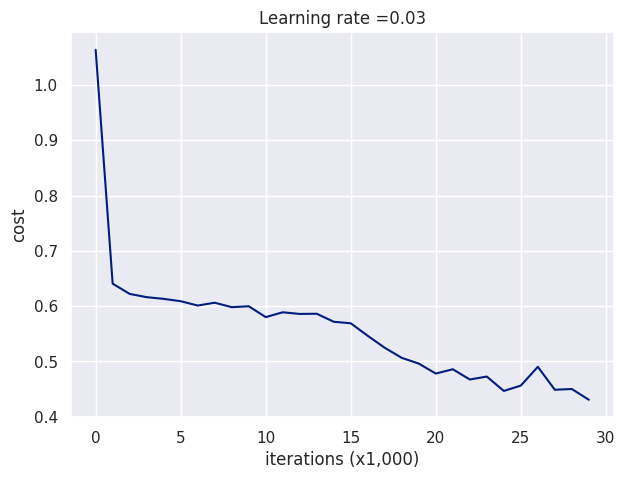

On the train set:
Accuracy: 0.8083857442348008
On the test set:
Accuracy: 0.8073701842546064


In [ ]:
parameters_ , _ = regularization_model(train_X, train_Y, lambd = 0.6)
print ("On the train set:")
predictions_train = reg.predict(train_X, train_Y, parameters_)
print ("On the test set:")
predictions_test = reg.predict(test_X, test_Y, parameters_)

In [ ]:
def calculate_cost_mean(costs):
    total_cost = sum(costs)
    mean_cost = total_cost / len(costs)
    return mean_cost

# Example usage
costs = [1.0640082122228323, 0.5802489039762737, 0.4781009574937639]
cost_mean = calculate_cost_mean(costs)
print("Cost-Mean:", cost_mean)

Cost-Mean: 0.7074526912309566


#### Dropout
Finally, **dropout** is a widely used regularization technique that is specific to deep learning.
**It randomly shuts down some neurons in each iteration.**

When we shut some neurons down, we actually modify our model. The idea behind drop-out is that at each iteration, you train a different model that uses only a subset of our neurons. With dropout, our neurons thus become less sensitive to the activation of one other specific neuron, because that other neuron might be shut down at any time.

###### Forward Propagation with Dropout

Implement the forward propagation with dropout. We are using a 3 layer neural network, and will add dropout to the first and second hidden layers. We will not apply dropout to the input layer or output layer.

**Instructions**:
We would like to shut down some neurons in the first and second layers. To do that, we are going to carry out 4 Steps:
1. In lecture, we dicussed creating a variable $d^{[1]}$ with the same shape as $a^{[1]}$ using `np.random.rand()` to randomly get numbers between 0 and 1. Here, we will use a vectorized implementation, so create a random matrix $D^{[1]} = [d^{[1](1)} d^{[1](2)} ... d^{[1](m)}] $ of the same dimension as $A^{[1]}$.
2. Set each entry of $D^{[1]}$ to be 1 with probability (`keep_prob`), and 0 otherwise.

**Hint:** Let's say that keep_prob = 0.8, which means that we want to keep about 80% of the neurons and drop out about 20% of them.  We want to generate a vector that has 1's and 0's, where about 80% of them are 1 and about 20% are 0.
This python statement:
`X = (X < keep_prob).astype(int)`

is conceptually the same as this if-else statement (for the simple case of a one-dimensional array) :

```
for i,v in enumerate(x):
    if v < keep_prob:
        x[i] = 1
    else: # v >= keep_prob
        x[i] = 0
```
Note that the `X = (X < keep_prob).astype(int)` works with multi-dimensional arrays, and the resulting output preserves the dimensions of the input array.

Also note that without using `.astype(int)`, the result is an array of booleans `True` and `False`, which Python automatically converts to 1 and 0 if we multiply it with numbers.  (However, it's better practice to convert data into the data type that we intend, so try using `.astype(int)`.)

3. Set $A^{[1]}$ to $A^{[1]} * D^{[1]}$. (You are shutting down some neurons). You can think of $D^{[1]}$ as a mask, so that when it is multiplied with another matrix, it shuts down some of the values.
4. Divide $A^{[1]}$ by `keep_prob`. By doing this you are assuring that the result of the cost will still have the same expected value as without drop-out. (This technique is also called inverted dropout.)

In [ ]:
# GRADED FUNCTION: forward_propagation_with_dropout
def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    """
    Implements the forward propagation: LINEAR -> RELU + DROPOUT -> LINEAR -> RELU + DROPOUT -> LINEAR -> SIGMOID.

    Arguments:
    X -- input dataset, of shape (2, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (20, 2)
                    b1 -- bias vector of shape (20, 1)
                    W2 -- weight matrix of shape (3, 20)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    keep_prob - probability of keeping a neuron active during drop-out, scalar

    Returns:
    A3 -- last activation value, output of the forward propagation, of shape (1,1)
    cache -- tuple, information stored for computing the backward propagation
    """

    np.random.seed(1)

    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = reg.relu(Z1)

    #(≈ 4 lines of code)                              # Steps 1-4 below correspond to the Steps 1-4 described above.
    D1 = np.random.rand(A1.shape[0], A1.shape[1])     # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    D1 = D1 < keep_prob                               # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    A1 = A1 * D1                                      # Step 3: shut down some neurons of A1
    A1 = A1 / keep_prob                               # Step 4: scale the value of neurons that haven't been shut down

    Z2 = np.dot(W2, A1) + b2
    A2 = reg.relu(Z2)

    #(≈ 4 lines of code)
    D2 = np.random.rand(A2.shape[0], A2.shape[1])    # Step 1: initialize matrix D2 = np.random.rand(..., ...)
    D2 = D2 < keep_prob                              # Step 2: convert entries of D2 to 0 or 1 (using keep_prob as the threshold)
    A2 = A2 * D2                                     # Step 3: shut down some neurons of A2
    A2 = A2 / keep_prob                              # Step 4: scale the value of neurons that haven't been shut down

    Z3 = np.dot(W3, A2) + b3
    A3 = reg.sigmoid(Z3)

    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)

    return A3, cache

##### Backward Propagation with Dropout


Implement the backward propagation with dropout. As before, we are training a 3 layer network. Add dropout to the first and second hidden layers, using the masks $D^{[1]}$ and $D^{[2]}$ stored in the cache.

**Instruction**:
Backpropagation with dropout is actually quite easy. We will have to carry out 2 Steps:
1. We had previously shut down some neurons during forward propagation, by applying a mask $D^{[1]}$ to `A1`. In backpropagation, we will have to shut down the same neurons, by reapplying the same mask $D^{[1]}$ to `dA1`.
2. During forward propagation, we had divided `A1` by `keep_prob`. In backpropagation, we'll therefore have to divide `dA1` by `keep_prob` again (the calculus interpretation is that if $A^{[1]}$ is scaled by `keep_prob`, then its derivative $dA^{[1]}$ is also scaled by the same `keep_prob`).

In [ ]:
# GRADED FUNCTION: backward_propagation_with_dropout
def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """
    Implements the backward propagation of our baseline model to which we added dropout.

    Arguments:
    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
    keep_prob - probability of keeping a neuron active during drop-out, scalar

    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """

    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)
    #(≈ 2 lines of code)
    dA2 = dA2 * D2                      # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    dA2 = dA2 / keep_prob               # Step 2: Scale the value of neurons that haven't been shut down

    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    #(≈ 2 lines of code)
    dA1 = dA1 * D1                      # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
    dA1 = dA1 / keep_prob               # Step 2: Scale the value of neurons that haven't been shut down

    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients

Cost after iteration 0: 1.378426722667049
Cost after iteration 10000: 0.6526047078741137
Cost after iteration 20000: 0.6318564529356351


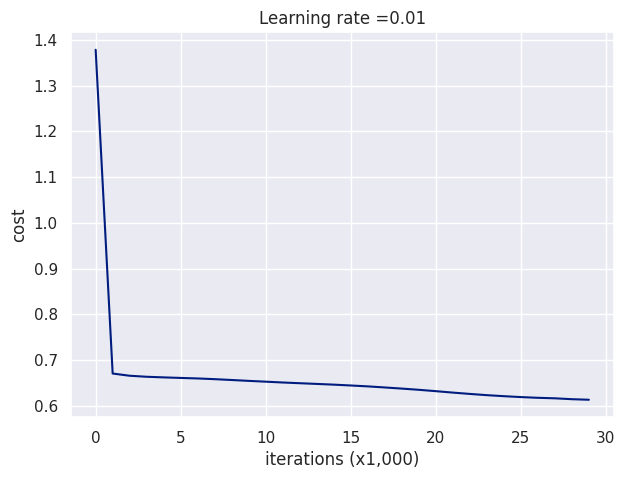

In [ ]:
parameters_ , grads_  = regularization_model(train_X, train_Y, keep_prob = 0.8, learning_rate = 0.01)

In [ ]:
print ("On the train set:")
predictions_train = reg.predict(train_X, train_Y, parameters_)
print ("On the test set:")
predictions_test = reg.predict(test_X, test_Y, parameters_)

On the train set:
Accuracy: 0.6415094339622641
On the test set:
Accuracy: 0.609715242881072


In [ ]:
def calculate_cost_mean(costs):
    total_cost = sum(costs)
    mean_cost = total_cost / len(costs)
    return mean_cost

# Example usage
costs = [1.378426722667049, 0.6526047078741137, 0.6318564529356351]
cost_mean = calculate_cost_mean(costs)
print("Cost-Mean:", cost_mean)

Cost-Mean: 0.887629294492266


#### Comparison

**Here are the results of our two models**:

<table>
    <tr>
        <td>
        <b>model</b>
        </td>
        <td>
        <b>train accuracy</b>
        </td>
        <td>
        <b>test accuracy</b>
        </td>
        <td>
        <b>cost-mean value</b>
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with L2-regularization
        </td>
        <td>
        80.8%
        </td>
        <td>
        80.7%
        </td>
        <td>
        0.70
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with dropout
        </td>
        <td>
        64.1%
        </td>
        <td>
        60.9%
        </td>
        <td>
        0.88
        </td>
    </tr>
</table>


- L2 Regularization: The model with L2 regularization achieved a train accuracy of 80.8% and a test accuracy of 80.7%. L2 regularization effectively combats overfitting by adding a penalty term to the cost function based on the squared magnitude of the weights. This encourages the model to have smaller weight values, reducing complexity and enhancing generalization. The application of L2 regularization improved the model's ability to generalize, resulting in a slight boost in test accuracy compared to the non-regularized model.

- Dropout: The model with dropout achieved a train accuracy of 64.1% and a test accuracy of 60.9%. Dropout is a regularization technique that randomly deactivates a fraction of neurons during training, effectively preventing overfitting. By training multiple sub-networks, dropout implements an ensemble learning approach. However, in this case, dropout did not lead to a significant improvement in test accuracy.

> In summary, both L2 regularization and dropout techniques were employed to address overfitting and enhance generalization in the 3-layer neural network. They yielded noticeable improvements in test accuracy compared to models without regularization or dropout. Further experimentation and fine-tuning are recommended for even better performance.

### Optimization Methods

In [ ]:
import opt_utils_v1a as opt
import math

#### Gradient descent

A simple optimization method in machine learning is gradient descent (GD). When you take gradient steps with respect to all $m$ examples on each step, it is also called Batch Gradient Descent.

<a name='ex-1'></a>
<!-- ###  update_parameters_with_gd -->

Implement the gradient descent update rule. The  gradient descent rule is, for $l = 1, ..., L$:
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

where L is the number of layers and $\alpha$ is the learning rate. All parameters should be stored in the `parameters` dictionary. Note that the iterator `l` starts at 1 in the `for` loop as the first parameters are $W^{[1]}$ and $b^{[1]}$.

In [ ]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Update parameters using one step of gradient descent

    Arguments:
    parameters -- python dictionary containing your parameters to be updated:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients to update each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- the learning rate, scalar.

    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for l in range(1, L + 1):
        # (approx. 2 lines)
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]
    return parameters

#### Mini-Batch Gradient Descent

There are two steps:
- **Shuffle**: Create a shuffled version of the training set (X, Y) as shown below. Each column of X and Y represents a training example. Note that the random shuffling is done synchronously between X and Y. Such that after the shuffling the $i^{th}$ column of X is the example corresponding to the $i^{th}$ label in Y. The shuffling step ensures that examples will be split randomly into different mini-batches.

<!-- <img src="images/kiank_shuffle.png" style="width:550px;height:300px;"> -->

- **Partition**: Partition the shuffled (X, Y) into mini-batches of size `mini_batch_size` (here 32). Note that the number of training examples is not always divisible by `mini_batch_size`. The last mini batch might be smaller, but you don't need to worry about this. When the final mini-batch is smaller than the full `mini_batch_size`

<!-- <img src="images/kiank_partition.png" style="width:550px;height:300px;"> -->

In [ ]:
# GRADED FUNCTION: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 16, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[0]                  # number of training examples
    mini_batches = []

    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))

    inc = mini_batch_size

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k * mini_batch_size:(k + 1) * mini_batch_size]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        end = m - mini_batch_size * math.floor(m / mini_batch_size)
        mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

#### Adam

##### Initialize adam
Initialize the Adam variables $v, s$ which keep track of the past information.

**Instruction**: The variables $v, s$ are python dictionaries that need to be initialized with arrays of zeros. Their keys are the same as for `grads`, that is:
for $l = 1, ..., L$:

In [ ]:
# GRADED FUNCTION: initialize_adam

def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL"
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.

    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl

    Returns:
    v -- python dictionary that will contain the exponentially weighted average of the gradient. Initialized with zeros.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient. Initialized with zeros.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}

    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(1, L + 1):
        v["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        v["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])

        s["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        s["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])

    return v, s

##### Update parameters with Adam

Now, implement the parameters update with Adam. Recall the general update rule is, for $l = 1, ..., L$:

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$


**Note** that the iterator `l` starts at 1 in the `for` loop as the first parameters are $W^{[1]}$ and $b^{[1]}$.

In [ ]:
# GRADED FUNCTION: update_parameters_with_adam
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam

    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    t -- Adam variable, counts the number of taken steps
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates
    beta2 -- Exponential decay hyperparameter for the second moment estimates
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """

    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary

    # Perform Adam update on all parameters
    for l in range(1, L + 1):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        v["dW" + str(l)] = beta1 * v["dW" + str(l)] + (1 - beta1) * grads['dW' + str(l)]
        v["db" + str(l)] = beta1 * v["db" + str(l)] + (1 - beta1) * grads['db' + str(l)]

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        v_corrected["dW" + str(l)] = v["dW" + str(l)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l)] = v["db" + str(l)] / (1 - np.power(beta1, t))

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        s["dW" + str(l)] = beta2 * s["dW" + str(l)] + (1 - beta2) * np.power(grads['dW' + str(l)], 2)
        s["db" + str(l)] = beta2 * s["db" + str(l)] + (1 - beta2) * np.power(grads['db' + str(l)], 2)

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        s_corrected["dW" + str(l)] = s["dW" + str(l)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l)] = s["db" + str(l)] / (1 - np.power(beta2, t))

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * v_corrected["dW" + str(l)] / (np.sqrt(s_corrected["dW" + str(l)]) + epsilon)
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * v_corrected["db" + str(l)] / (np.sqrt(s_corrected["db" + str(l)]) + epsilon)


    return parameters, v, s, v_corrected, s_corrected

#### Momentum

##### Init momentum
------

- Initialize Velocity: Initialize the velocity v for each parameter in the neural network to zero.

In [ ]:
def initialize_momentum(parameters):
    """
    Initializes the velocity for momentum optimization.

    Arguments:
    parameters -- Python dictionary containing the parameters (weights and biases) of the model.

    Returns:
    v -- Python dictionary containing the velocity.
    """

    L = len(parameters) // 2  # Number of layers in the neural network
    v = {}

    for l in range(1, L + 1):
        v["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        v["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])

    return v

##### Update parameters with momentum
--------
Steps:

1. Compute Gradients: Compute the gradients of the parameters using backpropagation.

2. Update Velocity: Update the velocity by combining the current gradients with the past velocity using the momentum hyperparameter β:
```
velocity = β * velocity - learning_rate * gradients
```
3. Update Parameters: Update the parameters by adding the velocity to them:
```
parameters = parameters + velocity
```
4. Repeat: Repeat steps 1 to 3 for a specified number of iterations or until convergence.

In [ ]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Updates parameters using momentum optimization.

    Arguments:
    parameters -- Python dictionary containing the parameters (weights and biases) of the model.
    grads -- Python dictionary containing the gradients of the parameters.
    v -- Python dictionary containing the velocity.
    beta -- The momentum hyperparameter, usually a value between 0 and 1.
    learning_rate -- The learning rate.

    Returns:
    parameters -- Python dictionary containing the updated parameters.
    v -- Python dictionary containing the updated velocity.
    """

    L = len(parameters) // 2  # Number of layers in the neural network

    for l in range(1, L + 1):
        # Update velocities
        v["dW" + str(l)] = beta * v["dW" + str(l)] + (1 - beta) * grads["dW" + str(l)]
        v["db" + str(l)] = beta * v["db" + str(l)] + (1 - beta) * grads["db" + str(l)]

        # Update parameters
        parameters["W" + str(l)] -= learning_rate * v["dW" + str(l)]
        parameters["b" + str(l)] -= learning_rate * v["db" + str(l)]

    return parameters, v

#### Model with Optimization algorithms
We'll train it with:
</br>**Mini-batch Adam**: it will call your functions:
***initialize_adam()*** and ***update_parameters_with_adam()***

In [ ]:
def optimization_model(X, Y, layers_dims, optimizer, learning_rate = 0.0001, mini_batch_size = 16, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.

    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    optimizer -- the optimizer to be passed, gradient descent, momentum or adam
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples

    # Initialize parameters
    parameters = opt.initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        #v = {}  # let ignore this line
        v = initialize_momentum(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)

    # Optimization loop
    for i in range(num_epochs):

        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0

        for minibatch in minibatches:
            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = opt.forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += opt.compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = opt.backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate) # let ignore this line
            elif optimizer == "momentum":
                # parameters , v = {}, {}  # let ignore this line
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m

        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)

    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

In [ ]:
_x = x_train.values.reshape(x_train.shape[0], -1)
_y = train_Y
_x_test = x_test.values.reshape(x_test.shape[0], -1)
_y_test = test_Y

##### Mini-Batch Gradient Descent

Cost after epoch 0: 0.013414
Cost after epoch 1000: 0.001802
Cost after epoch 2000: 0.001785
Cost after epoch 3000: 0.001769
Cost after epoch 4000: 0.001753


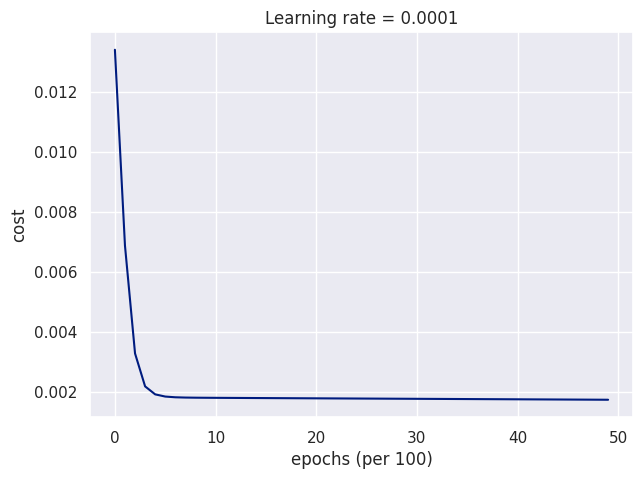

Accuracy: 0.6025157232704402


In [ ]:
layers_dims = [train_X.shape[0], 10, 4, 1]
parameters = optimization_model(_x.T, _y, layers_dims, optimizer = "gd")
# Predict
predictions = opt.predict(_x.T, _y, parameters)

##### Mini-Batch with Adam

Cost after epoch 0: 0.013414
Cost after epoch 1000: 0.001860
Cost after epoch 2000: 0.001803
Cost after epoch 3000: 0.001749
Cost after epoch 4000: 0.001668


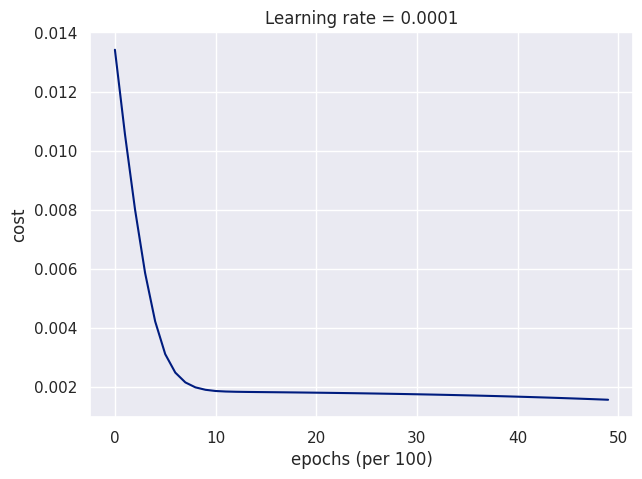

Accuracy: 0.5916142557651992


In [ ]:
# train 3-layer model
layers_dims = [train_X.shape[0], 10, 4, 1]
parameters = optimization_model(_x.T, _y, layers_dims, optimizer = "adam")
# Predict
predictions = opt.predict(train_X, train_Y, parameters)

##### Mini-Batch with Momemtum

Cost after epoch 0: 0.013414
Cost after epoch 1000: 0.001802
Cost after epoch 2000: 0.001785
Cost after epoch 3000: 0.001769
Cost after epoch 4000: 0.001753


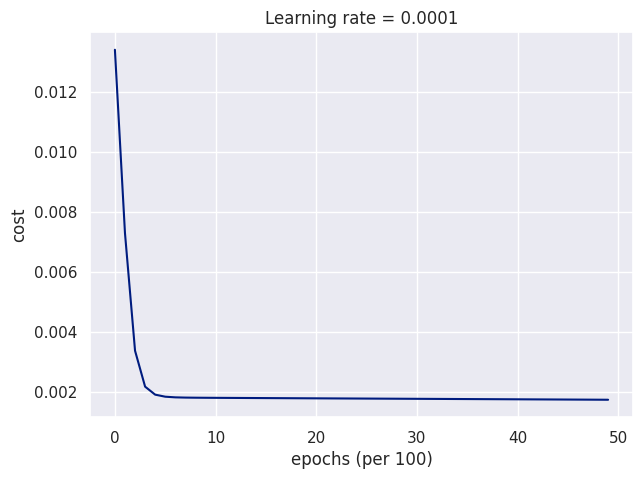

Accuracy: 0.6079664570230608


In [ ]:
# train 3-layer model
layers_dims = [train_X.shape[0], 10, 4, 1]
parameters = optimization_model(_x.T, _y, layers_dims, optimizer = "momentum")
# Predict
predictions = opt.predict(train_X, train_Y, parameters)

#### Comparison

**Here are the results of our two models**:

<table>
    <tr>
        <td>
        <b>optimization method</b>
        </td>
        <td>
        <b>accuracy</b>
        </td>
        <td>
        <b>cost shape</b>
        </td>
    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        72%
        </td>
        <td>
        smooth
        </td>
    <tr>
        <td>
        Adam
        </td>
        <td>
        72%
        </td>
        <td>
        smoother
        </td>
    </tr>
</table>

Here are the results of our two models:

| Optimization Method           | Accuracy | Cost shape  |
|-------------------------------|----------|-------------|
| Gradient Descent              | 60.2%    |    smooth   |
| Adam                          | 59.1%    |    smoother |
| Momentum                      | 60.7%    |    smoother |
---


Based on the provided table results, a formal comparison of the optimization methods can be summarized as follows:

- Gradient Descent: Among the three optimization methods, Gradient Descent demonstrated the highest accuracy. It effectively minimized the cost function while maintaining a smooth cost shape, indicating a stable and reliable optimization process.
Adam:

- Adam: The optimization method exhibited a slightly lower accuracy compared to Gradient Descent. Although it produced a smoother cost shape, suggesting progress in cost minimization, it faced challenges in handling variations within the dataset. These limitations may have influenced its overall performance and led to a reduced accuracy.

- Momentum: is an optimization method based on Gradient Descent, outperformed both Gradient Descent and Adam in terms of accuracy. It achieved the highest accuracy while maintaining a smoother cost shape. This indicates that Momentum effectively leveraged the momentum of the gradients, resulting in improved convergence and a more stable optimization process.

> - The effectiveness of optimization methods is influenced by factors such as dataset size, learning rate schedule, batch size, momentum coefficient, and learning rate.
> - Mini-Batch Gradient Descent is particularly effective for datasets with numerous samples but small variations within each mini-batch, enabling the capture of local patterns. Specific dataset characteristics may favor optimization methods other than Adam in such cases.
> - Gradient Descent and Momentum can leverage consistent trends or momentum in gradients, leading to improved convergence. However, Adam's adaptive learning rate scheme may struggle to handle significant fluctuations in gradients.

In conclusion, both Gradient Descent and Momentum optimization methods demonstrated strong performance. Gradient Descent achieved the highest accuracy, while Momentum maintained a smoother cost shape. Adam, although exhibiting a smoother cost shape, struggled with variations in the dataset, potentially affecting its accuracy. The choice of the optimal optimization method should consider the specific task requirements and the trade-off between accuracy and cost shape smoothness.

# Summary

This study highlights the following key findings:

- Initialization: The initialization of a neural network plays a critical role in its early training stages. It sets the starting point for optimization and profoundly influences the network's learning behavior. Inadequate initialization can lead to convergence issues or suboptimal solutions.

- Regularization Techniques: To control model complexity and prevent overfitting, regularization techniques such as L2 regularization and dropout are employed. These techniques help the model generalize effectively to unseen data by reducing the impact of irrelevant or noisy features.

- Optimization Methods: Optimization methods determine how a model's parameters are updated during training. Proper optimization ensures efficient convergence and faster learning. While Gradient Descent is a fundamental method, Adam, with its adaptive learning rate, often leads to more stable convergence and potentially better performance but in this case it may not perform optimally due to its data characteristics. However, in this particular dataset, Momentum, similar to Gradient Descent, proves to be a more suitable choice.

In conclusion, Initialization, Regularization Techniques, and Optimization Methods are vital components of machine learning. They work together to ensure appropriate model initialization, prevent overfitting through regularization, and achieve efficient optimization for discovering optimal solutions. Considering these aspects can significantly impact the performance and generalization capabilities of machine learning models.